# 데이터 URL
https://dacon.io/competitions/official/235985/data

# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
import gc

feature 설명

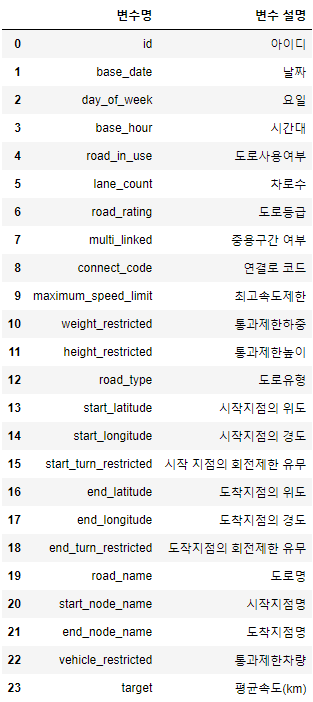

# 데이터셋 로드

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터셋 로드

In [4]:
# 모든 행 출력
pd.set_option('display.max_columns', None)

# 데이터 불러오기
# train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/train.parquet')
# test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/test.parquet')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

# 데이터 확인하기
display(train.head())
display(test.head())

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [5]:
train.shape, test.shape

((4701217, 23), (291241, 22))

## info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

## 데이터 전처리

In [8]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            int64  
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  int64  
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    int64  
 22  target            

## downcast
- maximum_speed_limit (최고속도제한): float -> int
- height_restricted (통과제한높이): float -> int
- vehicle_restricted (통과제한차량): float -> int

In [10]:
# maximum_speed_limit (최고속도제한): float -> int
# height_restricted (통과제한높이): float -> int
# vehicle_restricted (통과제한차량): float -> int

train["maximum_speed_limit"] = train["maximum_speed_limit"].astype(int)
train["height_restricted"] = train["height_restricted"].astype(int)
train["vehicle_restricted"] = train["vehicle_restricted"].astype(int)
train[["maximum_speed_limit", "height_restricted", "vehicle_restricted"]]

,maximum_speed_limit,height_restricted,vehicle_restricted
0,60,0,0
1,60,0,0
2,80,0,0
3,50,0,0
4,80,0,0
...,...,...,...
4701212,50,0,0
4701213,80,0,0
4701214,60,0,0
4701215,80,0,0


In [11]:
for col in train.columns:
    if train[col].dtypes == "int64":
        train[col] = pd.to_numeric(train[col], downcast="unsigned")
    elif train[col].dtypes == "float64":
        train[col] = pd.to_numeric(train[col], downcast="float")
    elif train[col].dtypes == "bool":
        train[col] = pd.to_numeric(train[col], downcast="int8")
    elif train[col].dtypes == "object":
        train[col] = train[col].astype("category")

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   id                     category
 1   base_date              uint32  
 2   day_of_week            uint8   
 3   base_hour              uint8   
 4   lane_count             uint8   
 5   road_rating            uint8   
 6   road_name              category
 7   multi_linked           uint8   
 8   connect_code           uint8   
 9   maximum_speed_limit    uint8   
 10  vehicle_restricted     uint8   
 11  weight_restricted      float32 
 12  height_restricted      uint8   
 13  road_type              uint8   
 14  start_node_name        category
 15  start_latitude         float32 
 16  start_longitude        float32 
 17  start_turn_restricted  uint8   
 18  end_node_name          category
 19  end_latitude           float32 
 20  end_longitude          float32 
 21  end_turn_restricted    uint8   

# 학습, 예측 데이터셋 나누기

In [14]:
label_name = "target"
label_name

'target'

In [15]:
feature_names = train.columns.tolist()
feature_names.remove("target")
feature_names.remove("id")
feature_names.remove("base_date")
feature_names.remove("road_name")
feature_names.remove("start_node_name")
feature_names.remove("end_node_name")
feature_names.remove("vehicle_restricted")
feature_names

['day_of_week',
 'base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'start_turn_restricted',
 'end_latitude',
 'end_longitude',
 'end_turn_restricted']

In [16]:
# X_train = pd.get_dummies(train[feature_names])
# y_train = train[label_name]
# X_test = pd.get_dummies(test)

# X_train = train[feature_names]
# y_train = train[label_name]
# X_test = test[feature_names]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[feature_names], train[label_name], test_size=0.33)

In [17]:
# X_train.shape, X_test.shape, y_train.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3149815, 16), (1551402, 16), (3149815,), (1551402,))

# 머신러닝 모델

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1, random_state=42)
model_rf

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

# 학습

In [19]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2000, min_samples_leaf=150, n_jobs=-1,
                      random_state=42)

# 예측

In [20]:
y_predict = model_rf.predict(X_test)

In [21]:
(np.round_(y_predict, 0) == np.round_(y_test, 0)).mean()

0.11342127959097642

# 정확도

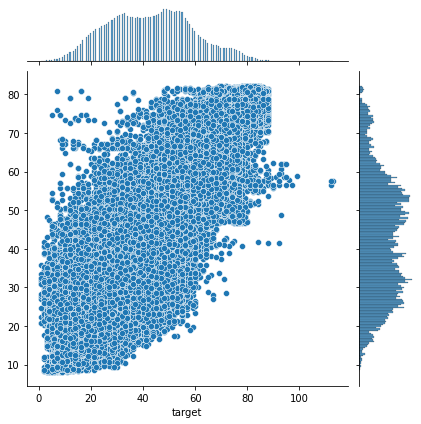

In [22]:
sns.jointplot(x=y_test, y=y_predict)

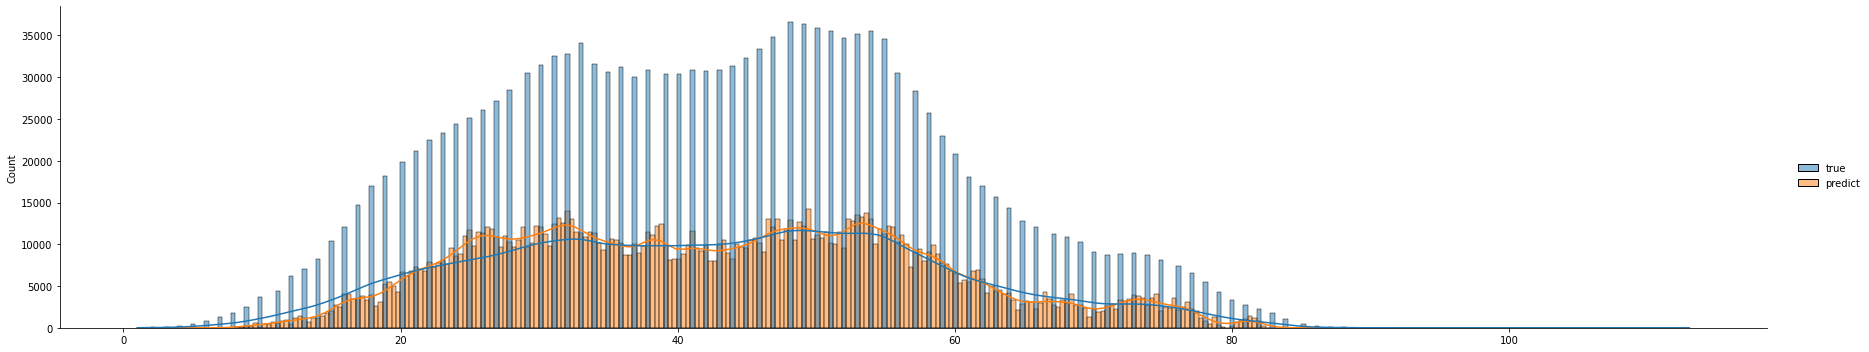

In [23]:
df_y = pd.DataFrame({"true": y_test, "predict":y_predict})
sns.displot(df_y, kde=True, aspect=5)

# 오차 (MSE)

In [24]:
mae = abs(y_test - y_predict).mean()
mae

3.587297856798299

# 트리 알고리즘 분석

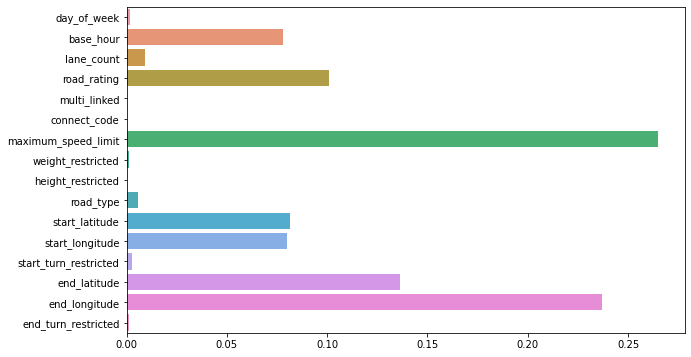

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_rf.feature_importances_, y=model_rf.feature_names_in_)

# 캐글 제출

In [28]:
pred = model_rf.predict(test[feature_names])

In [29]:
submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv", index_col="id")
submit.head()

,target
id,
TEST_000000,0
TEST_000001,0
TEST_000002,0
TEST_000003,0
TEST_000004,0


In [30]:
submit["target"] = pred
submit.head()

,target
id,
TEST_000000,24.685890
TEST_000001,44.727953
TEST_000002,64.712798
TEST_000003,37.083382
TEST_000004,45.177936


In [31]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/submit_2.csv")

In [32]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/submit_2.csv").head()

,id,target
0,TEST_000000,24.685890
1,TEST_000001,44.727953
2,TEST_000002,64.712798
3,TEST_000003,37.083382
4,TEST_000004,45.177936
